## Problem 2: Create buffers around shopping centers (7 points)

Let’s continue with our case study and calculate a 1.5 km buffer around the geocoded points. 

### a) Load the shopping centre data set

First, load the shopping centre *point* data set you created in *problem 1* into a `GeoDataFrame` called `shopping_centres`.

In [1]:
# ADD YOUR OWN CODE HERE

import pandas as pd
import geopandas as gpd

import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

shopping_centres = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg")

In [2]:
type(shopping_centres)

geopandas.geodataframe.GeoDataFrame

In [3]:
shopping_centres

,address,id,name,addr,geometry
0,"Galeria Krakowska, 5, Pawia, Wesoła, Stare Mia...",1,Galeria Krakowska,"Pawia 5, 31-154 Kraków, Poland",POINT (25138251.060 5560613.785)
1,"Bonarka City Center, 11, Generała Henryka Kami...",2,Centrum Handlowe Bonarka,"Henryka Kamieńskiego 11, 30-644 Kraków, Poland",POINT (25138280.056 5556188.048)
2,"Biedronka, 46, Siewna, Prądnik Biały, Kraków, ...",3,Centrum Siewna,"Siewna 46, 31-231 Kraków, Poland",POINT (25138616.805 5563799.309)
3,"Galeria Bronowice, 61, Stawowa, Bronowice Wiel...",4,Bronowice Mall,"Stawowa 61, 31-346 Kraków, Poland",POINT (25135013.131 5563569.613)
4,"Cinema City, 62, Zakopiańska, Borek Fałęcki, Ł...",5,Park Handlowy Zakopianka,"Zakopiańska 62, 30-418 Kraków, Poland",POINT (25136754.156 5555011.892)
5,"mBank, 67, Aleja Pokoju, Beszcz, Łęg, Czyżyny,...",6,M1 Krakow,"Aleja Pokoju 67, 31-580 Kraków, Poland",POINT (25142006.343 5559966.534)
6,"1, Aleja Zygmunta Krasińskiego, Zwierzyniec, K...",7,Jubilat,"Aleja Zygmunta Krasińskiego 1, 31-111 Kraków, ...",POINT (25136834.711 5559383.795)


<AxesSubplot: >

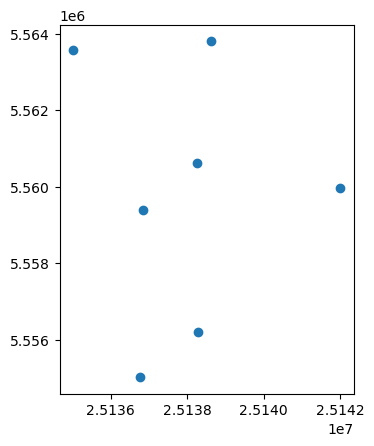

In [4]:
shopping_centres.plot()


---

### b) Create a *buffer* around the points

Calculate a 1.5 km buffer for each geocoded point. Overwrite the `geometry` column with the new buffer geometry.

Use the [`geopandas.GeoDataFrame.buffer()` method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), that uses shapely’s [`buffer()`](http://toblerity.org/shapely/manual.html#object.buffer) in the background. You only need to care about the `distance` parameter, don’t worry about the possible other arguments.

In [10]:
# ADD YOUR OWN CODE HERE
shopping_centres["geometry"] = shopping_centres.buffer(distance=1500)
shopping_centres

,address,id,name,addr,geometry
0,"Galeria Krakowska, 5, Pawia, Wesoła, Stare Mia...",1,Galeria Krakowska,"Pawia 5, 31-154 Kraków, Poland","POLYGON ((25141249.253 5560687.387, 25141249.2..."
1,"Bonarka City Center, 11, Generała Henryka Kami...",2,Centrum Handlowe Bonarka,"Henryka Kamieńskiego 11, 30-644 Kraków, Poland","POLYGON ((25141278.249 5556261.649, 25141278.2..."
2,"Biedronka, 46, Siewna, Prądnik Biały, Kraków, ...",3,Centrum Siewna,"Siewna 46, 31-231 Kraków, Poland","POLYGON ((25141614.998 5563872.911, 25141614.9..."
3,"Galeria Bronowice, 61, Stawowa, Bronowice Wiel...",4,Bronowice Mall,"Stawowa 61, 31-346 Kraków, Poland","POLYGON ((25138011.324 5563643.214, 25138011.3..."
4,"Cinema City, 62, Zakopiańska, Borek Fałęcki, Ł...",5,Park Handlowy Zakopianka,"Zakopiańska 62, 30-418 Kraków, Poland","POLYGON ((25139752.350 5555085.494, 25139752.3..."
5,"mBank, 67, Aleja Pokoju, Beszcz, Łęg, Czyżyny,...",6,M1 Krakow,"Aleja Pokoju 67, 31-580 Kraków, Poland","POLYGON ((25145004.536 5560040.135, 25145004.5..."
6,"1, Aleja Zygmunta Krasińskiego, Zwierzyniec, K...",7,Jubilat,"Aleja Zygmunta Krasińskiego 1, 31-111 Kraków, ...","POLYGON ((25139832.904 5559457.396, 25139832.9..."


In [9]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert shopping_centres.geometry.geom_type.unique() == ["Polygon"]


---

### d) Save buffer geometry layer

Save the data frame containing the buffer geometries into a new layer `buffers` inside the same *GeoPackage* `shopping_centres.gpkg`:

In [11]:
# ADD YOUR OWN CODE HERE

shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers")